In [1]:
import random
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time
from scipy import fft
from scipy import signal

In [254]:
def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception :
        # cv.destroyAllWindows()
        print('error')

def show_picture(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def show_picture_not_close(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        # cv.waitKey(0)
        # cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def inverse_image(image):
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        vmax = np.max(image)

        new_image = vmax - (1) - image

        result = np.array(new_image)
        return result

def gray_image(image):
    mx = np.max(image)
    mn = np.min(image)
    amp = mx-mn
    img_restore_shift = (((image-mn)/amp)*255).astype('int')
    if (np.max(img_restore_shift)>255):
        img_restore_shift = gray_image(img_restore_shift)
    return img_restore_shift

def build_histogram(image):
    x_len, y_len = image.shape[0], image.shape[1]


    histogram = np.zeros(256)
    print(histogram.shape)
    for i in range(x_len):
        for e in range(y_len):
            histogram[image[i,e]]+=1
    mx = np.max(histogram)
    histogram = (histogram/mx)*255
    return histogram

def build_cdf(histogram):
    cdf = np.zeros(256)
    cdf[0] = histogram[0]
    for i in range(1, histogram.shape[0]):
        cdf[i]+=cdf[i-1]+histogram[i]
    mx = np.max(cdf)
    cdf = (cdf/mx)*255
    return cdf

from numpy import ndarray
from typing import Union
from random import randint


def fourier_transform_1d(vector, dt=None, in_complex=False):
    # start_time = time.time()
    N = len(vector)
    if dt:
        # dt = 1
        fgr = 1. / (dt * 2)
        print(fgr)
        df = (2. * fgr) / N
        print(df)
        gr = int(fgr / df)*2
        # data_new = vector.copy()[:int(fgr / df)]
        if in_complex:
            data_new = np.zeros(gr, np.csingle)
        else:
            data_new = np.zeros(gr, np.float)
        data_x_new = df * np.array(range(int(fgr / df)))


        data_np = np.array(vector)
    else:
        # data_new = np.zeros(N//2)
        gr = N
        if in_complex:
            data_new = np.zeros(gr, np.csingle)
        else:
            data_new = np.zeros(gr, np.float)
        data_x_new = np.array(range(N // 2))

        data_np = np.array(vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)
        '''Оптимизированный способ'''
        # re = np.sum(data_np * np.cos((2 * np.pi * n * np.arange(N)) / N))
        # im = np.sum(data_np * np.sin((2 * np.pi * n * np.arange(N)) / N))
        # re /= N
        # im /= N
        imre = np.sum(data_np*np.exp(2*(-1j)*np.pi*n*np.arange(N)/N))
        if in_complex:
            # data_new[n] = complex(re, im)
            data_new[n] = imre
        else:
            # data_new[n] = math.sqrt(re ** 2 + im ** 2)
            # data_new[n] = re + im
            data_new[n] = imre.real+imre.imag
    # print('elapsed', time.time() - start_time)

    # tmp = data_new[gr//2:]
    # data_new = np.array(list(tmp)+list(data_new[:gr//2]))

    return data_new

def fourier_transform_1d_back(complex_vector, dt=None):
    # start_time = time.time()
    N = len(complex_vector)
    if dt:
        # dt = 1
        fgr = 1. / (dt * 2)
        print(fgr)
        df = (2. * fgr) / N
        print(df)
        gr = int(fgr / df)*2
        data_new = np.zeros(gr, np.float)
        data_x_new = df * np.array(range(int(fgr / df)))
        data_np = np.array(complex_vector)
    else:
        gr = N
        data_new = np.zeros(gr)
        data_x_new = np.array(range(N // 2))

        data_np = np.array(complex_vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)

        '''Оптимизированный способ'''
        # re = np.sum(data_np * np.cos((2 * math.pi * n * np.arange(N)) / N))
        # im = np.sum(data_np * np.sin((2 * math.pi * n * np.arange(N)) / N))
        # re /= N
        # im /= N
        # data_new[n] = re + im

        imr = np.sum(data_np * np.exp(1j *2*dt * np.pi*n*np.arange(N))/N)
        data_new[n] = complex(imr).real+complex(imr).imag

    # print('elapsed', time.time() - start_time)
    return data_new

def diff_func(vector, dt=None):
    N = len(vector)
    diff = np.zeros(N)

    for i in range(N-1):
        if vector[i]==0:
            diff[i]=0
            continue
        if dt:
            diff[i] = (vector[i+1]-vector[i])/dt
        else:
            diff[i] = (vector[i+1]-vector[i])
    return diff


def fourier_transform_2d(matrix, dt=None, in_complex=False):
    # start_time = time.time()
    xl, yl = matrix.shape[0], matrix.shape[1]
    print(xl)
    if dt:
        fgr = 1. / (dt * 2)
        df = (2. * fgr) / yl
        gr = int(fgr / df)*2
        data_new = np.zeros(gr, np.csingle)
    else:
        gr = yl
        data_new = np.zeros(gr, np.csingle)

    '''Спектр высчитывается вручную'''
    # matrix_n = np.zeros((xl,yl),np.csingle)
    #
    # for ix in range(xl):
    #     for ey in range(yl):
    #         sm = 0
    #         for il in range(x):
    #             for el in range(y):
    #                 sm+=matrix[il,el]*np.exp(-1j*2*np.pi*((ix*il)/x+(ey*el)/y))
    #         matrix_n[ix,ey] = sm

    matrix_n = fft.fft2(matrix)
    # matrix_n1 = list(matrix_n[:xl//2, :yl//2])
    # matrix_n2 = list(matrix_n[:xl//2, yl//2:])
    # matrix_n3 = list(matrix_n[xl//2:, :yl//2])
    # matrix_n4 = list(matrix_n[xl//2:, yl//2:])
    #
    # n_matrix1 = matrix_n4 + matrix_n2
    # n_matrix2 = matrix_n3 + matrix_n1
    # n_matrix = n_matrix1+n_matrix2

    # matrix_n = np.zeros(matrix_n.shape)
    # matrix_n[:xl//2, :yl//2] = matrix_n3
    # matrix_n[:xl//2, yl//2:] = matrix_n4
    # matrix_n[xl//2:, :yl//2] = matrix_n1
    # matrix_n[xl//2:, yl//2:] = matrix_n2

    return matrix_n
    # return np.array(matrix_n)

def fourier_transform_2d_back(matrix, dt=None, in_complex=False):
    # start_time = time.time()
    xl, yl = matrix.shape[0], matrix.shape[1]
    print(xl)
    if dt:
        fgr = 1. / (dt * 2)
        df = (2. * fgr) / yl
        gr = int(fgr / df)*2
    else:
        gr = yl

    '''высчитывается вручную'''
    # matrix_n = np.zeros((xl,yl),np.csingle)
    #
    # for ix in range(xl):
    #     for ey in range(yl):
    #         sm = 0
    #         for il in range(x):
    #             for el in range(y):
    #                 sm+=matrix[il,el]*np.exp(1j*2*np.pi*((ix*il)/x+(ey*el)/y))
    #         matrix_n[ix,ey] = sm

    matrix_n = fft.ifft2(matrix)

    return matrix_n

def show_plot(func, x=None,  title = 'title'):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.grid()
    if x is not None:
        plt.plot(x, func)
    else:
        plt.plot(func)

def show_plots(funcs, x=None,  title = 'title'):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    plt.title(title)
    plt.grid()
    for i in range(len(funcs)):
        if x is not None:
            ax.plot(x, funcs[i])
        else:
            ax.plot(funcs[i])

def gamma_transform_image(image, C: float, gamma: float):
    # try:
    # print('here')
    new_image = []
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        # print(image[:10])
        new_image = C * (image ** gamma)
        # print(new_image[:10])

        result = np.array(new_image)
        # result = np.array(new_image)
        # print('time', time.time()-start_time)
        # print('orig shape', result.shape)
        return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

def equalize(image, cdf):
    x_len, y_len = image.shape[0], image.shape[1]
    new_image = np.zeros((x_len, y_len))
    int_hist = np.array(cdf).astype('int')
    for i in range(x_len):
        for e in range(y_len):
            new_image[i,e] = int_hist[image[i,e]]

    return new_image

def autocorrelation_vector(vector):
    n = vector.shape[0]
    av = np.average(vector)
    vector_av = vector-av
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def correlation_vector(vector, vector2):
    n = vector.shape[0]
    av = np.average(vector)
    av2 = np.average(vector2)
    vector_av = vector-av
    vector2_av = vector2-av2
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector2_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def convolution(vector1, vector2):
    """
    Функция свёртки

    :param
    :return:
    """
    M = len(vector1)
    N = len(vector2)

    # data_new = np.zeros(N+M)
    #
    # for k in range(N+M):
    #     sm = 0
    #     for j in range(M):
    #         if k-j < 0:
    #             sm += func.data[k - j] * self.data[j]
    #             continue
    #         if k-j>=N:
    #             sm += func.data[(k - j)%N] * self.data[j]
    #             continue
    #         sm += func.data[(k - j) % N] * self.data[j]
    #     data_new[k] = sm
    #
    # data_new = data_new[M//2:-M//2]
    # data_x_new = np.array(range(N))

    '''с помощью библиотеки'''
    data_new = signal.convolve(vector1, vector2, mode='same')
    # data_new = np.convolve(self.data, func.data, mode='full')
    # data_x_new = np.arange(len(data_new))

    return data_new

def normilize(vector, vl=None):
    mx = vl
    if vl is None:
        mx = np.max(vector)
    vector/=mx
    return vector

class Filter:
    """Цифровые фильтры частот"""

    @staticmethod
    def lpf(fc, dt, m) -> list:
        data = []
        m: int = m
        fc: float = fc
        dt: float = dt

        d = [0.35577019, 0.2436983, 0.07211497, 0.00630165]
        # rectangular part weights
        fact = 2 * fc * dt
        arg = fact * np.pi
        data = np.sin(arg * np.array(range(1, m + 1))) / np.array(np.array(range(1, m + 1)) * np.pi)
        data = list(data)
        data.insert(0, fact)

        # trapezoid smoothing in the end
        data[m] /= 2.
        #
        # # P310 smoothing window
        sumg = data[0]
        for i in range(1, m + 1):
            sum = d[0]
            arg = np.pi * i / m
            for k in range(1, 4):
                sum += 2. * d[k] * np.cos(arg * k)
            data[i] *= sum
            sumg += 2 * data[i]

        for i in range(m + 1):
            data[i] /= sumg

        sym_data = data[:0:-1]
        data = sym_data + data

        return data

    @staticmethod
    def hpf(fc, dt, m) -> list:
        data = []
        lpw = Filter.lpf(fc, dt, m)
        mmax = max(lpw)
        for i in range(2*m+1):
            val = 1.-lpw[i] if i == m else -lpw[i]
            data.append(val)

        return data

    @staticmethod
    def bpf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            data.append(lpw2[i]-lpw1[i])

        return data

    @staticmethod
    def bsf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            val = 1. + lpw1[i] - lpw2[i] if i == m else lpw1[i] - lpw2[i]
            data.append(val)

        return data

def generate_salt_noise(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)
    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] += randint(val-d, val+d)
    return image.astype('int')

def generate_salt_noise2(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)

    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] += randint(val-d, val+d)
    for i in range(y):
        nn = randint(0,n)
        pos = random.sample(range(x), int(nn))
        image[pos, i] += randint(val-d, val+d)
    return image.astype('int')

def generate_pepper_noise(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)
    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] -= randint(val-d, val+d)
        image[image<0] = 0
    return image.astype('int')

def generate_pepper_noise2(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)

    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] -= randint(val-d, val+d)

    for i in range(y):
        nn = randint(0,n)
        pos = random.sample(range(x), int(nn))
        image[pos, i] -= randint(val-d, val+d)

    # image[image<0] = 0
    return image.astype('int')

def generate_random_noise2(form:Union[tuple, ndarray], mn=0, mx=0):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.random.random(size=(x,y)) * (mx - mn) + mn
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
        image+=np.array(np.random.random(size=(x,y)) * (mx - mn) + mn, 'int')

    return np.array(image, 'int')

def avg_filter_clear(image, shape):
    image_c = np.array(image)
    image_c2 = np.array(image)

    dx = 0
    dy = 0

    lx,ly = image.shape

    mx, my = shape[0]//2, shape[1]//2

    for i in range(lx):
        for e in range(ly):
            le = i-mx if i-mx >= 0 else 0
            lr = i+mx if i+mx < lx else lx
            re = e-my if e-my >= 0 else 0
            rr = e+my if e+my < ly else ly
            image_c2[i, e] = np.average(image_c[le:lr,re:rr])
    return image_c2

def mean_filter_clear(image, shape):
    image_c = np.array(image)
    image_c2 = np.array(image)

    dx = 0
    dy = 0

    lx,ly = image.shape

    mx, my = shape[0]//2, shape[1]//2

    for i in range(lx):
        for e in range(ly):
            le = i-mx if i-mx >= 0 else 0
            lr = i+mx if i+mx < lx else lx
            re = e-my if e-my >= 0 else 0
            rr = e+my if e+my < ly else ly
            image_c2[i, e] = np.median(image_c[le:lr,re:rr])
    return image_c2

def add_zeros(data, size):
    n_array = np.zeros(size)
    if isinstance(size, tuple):
        print('is tuple')
        xl, yl = size
        if len(data.shape) == 2:
            print('2')
            xd, yd = data.shape
            tmp = (xl - xd)/2
            stx, endx = tmp, xl-tmp
            tmp = (yl - yd)/2
            sty, endy = tmp, yl-tmp

            n_array[stx:endx,sty:endy] = data

        else:
            xd, yd = 1, len(data)
            tmp = (xl - xd)/2
            stx, endx = int(tmp), int(xl-tmp)
            tmp = (yl - yd)/2
            sty, endy = int(tmp), int(yl-tmp)

            n_array[stx:endx,sty:endy] = data
    return n_array

def best_image(image2):
    image_g = gray_image(image2)
    print(np.max(image_g))
    hist = build_histogram(image_g)
    dist = build_cdf(hist)

    image_r = equalize(image_g, dist)
    return image_r

def binar_image(image, perc):
    image = gray_image(image)
    porog = perc * np.max(image)

    image[image < porog] = 0
    image[image >= porog] = 255

    return image

In [288]:
path = r"D:\study\moed2\7lab\model.jpg"
# path = r"D:\study\moed2\7lab\model_4n.jpg"
# path = r"D:\study\moed2\7lab\model_4v.jpg"
# path = r"D:\study\moed2\7lab\model_5n.jpg"
# path = r"D:\study\moed2\7lab\model_5v.jpg"

img = cv.imread(path)
print(img.shape)
imgt = img[:,:,2]
print(img.shape)
xlen, ylen = imgt.shape

(300, 400, 3)
(300, 400, 3)


61
70.0
229
(300, 400)


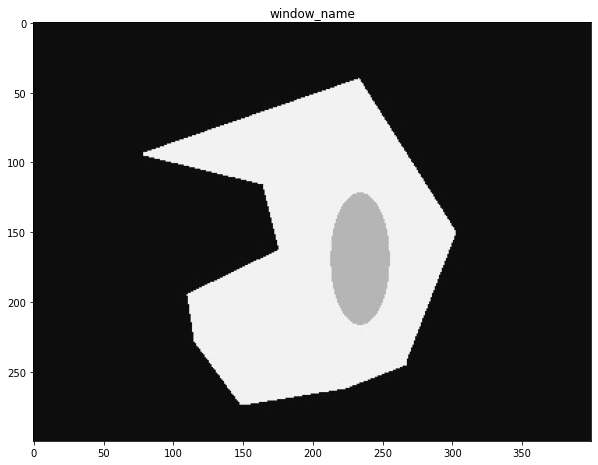

In [4]:
print(np.min(img))
print(np.median(img))
print(np.max(img))
show_picture_plot(img)
print(img.shape)

C:\Users\ACER\AppData\Local\Temp\ipykernel_3068\1916155210.py:101: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_new = np.zeros(gr, np.float)
d:\programms\pycharm 2021.2\venvs\moed2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


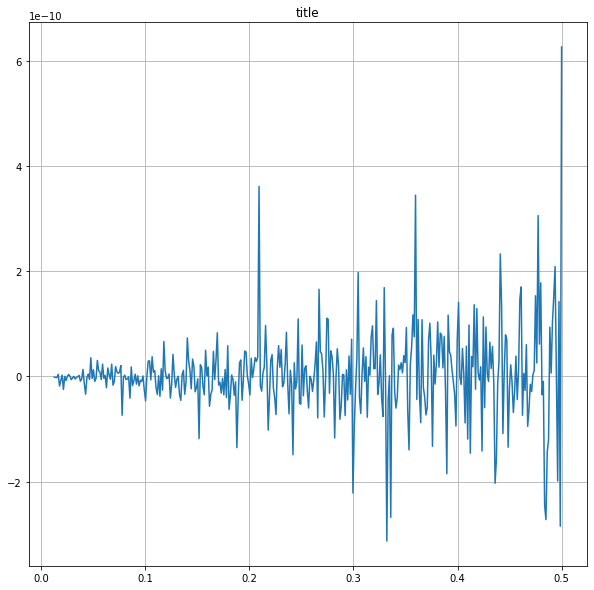

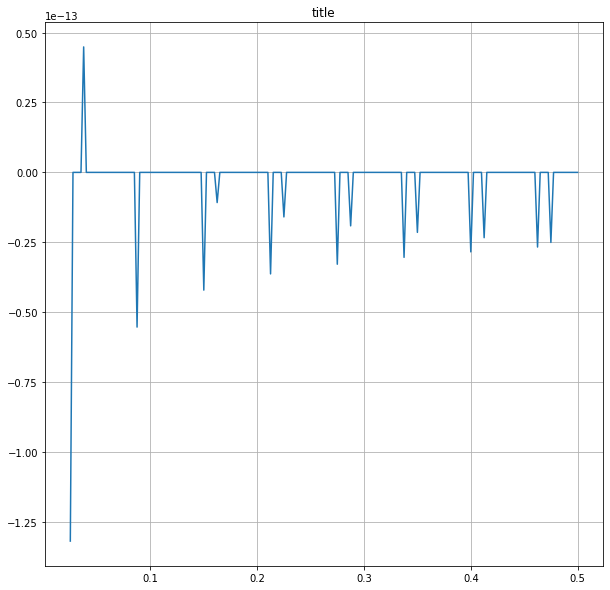

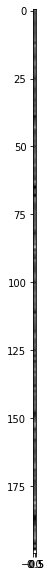

In [15]:
fourier_line = fourier_transform_1d(img[0])
l = fourier_line.shape[0]
x = np.linspace(0, 0.5, l)
t =10
show_plot(fourier_line[t:], x[t:])
# show_plot(fourier_line[l//2:], x[l//2:])
# show_plot(fourier_line2[l//2:], x[l//2:])
image_line_f = fourier_line[l//2:, np.newaxis]
show_picture_plot(image_line_f,'')

In [ ]:
dt = 1
filter = Filter.lpf(0.35, dt, 32)

show_plot(filter)

filter_f = fourier_transform_1d(filter,dt)
fgr = 1. / (dt * 2)
print(fgr)
df = (2. * fgr) / len(filter)
print(df)
print(int(fgr / df))
data_x_new = df * np.array(range(int(fgr / df)))

# filter_f = fft.fft(filter)
# tmp_x = fft.fftfreq(len(filter_f), 0.001)
x = np.linspace(0, 0.5, len(filter_f))
# show_plot(filter_f, data_x_new)
show_plot(filter_f, x)

In [158]:
## производная
new_lines=[]
dt = 1
# filter = Filter.hpf(0.03, dt, 64)
# filter = Filter.lpf(0.07, dt, 64)
filter = Filter.bpf(0.05, 0.9, dt, 64)
# print(lines.shape)
print(img.shape[1])
for i in range(img.shape[0]):
    # line_f = fourier_transform_1d(img[i])
    dif_line = diff_func(img[i])
    conv = convolution(dif_line, filter)
    new_lines.append(conv)
    if i%100==0:
        print((i/(img.shape[1]//2))*100)

400
0.0
50.0


C:\Users\ACER\AppData\Local\Temp\ipykernel_5596\1916155210.py:185: RuntimeWarning: overflow encountered in ubyte_scalars
  diff[i] = (vector[i+1]-vector[i])


100.0


In [159]:
new_lines_v=[]
dt = 1
# filter = Filter.hpf(0.03, dt, 64)
# filter = Filter.lpf(0.07, dt, 64)
filter = Filter.bpf(0.05, 0.9, dt, 64)
# print(lines.shape)
print(img.shape[0])
for i in range(img.shape[1]):
    # line_f = fourier_transform_1d(img[i])
    dif_line = diff_func(img[:,i])
    conv = convolution(dif_line, filter)
    new_lines_v.append(conv)
    if i%100==0:
        print((i/(img.shape[0]))*100)

300
0.0
33.33333333333333
66.66666666666666


C:\Users\ACER\AppData\Local\Temp\ipykernel_5596\1916155210.py:185: RuntimeWarning: overflow encountered in ubyte_scalars
  diff[i] = (vector[i+1]-vector[i])


100.0


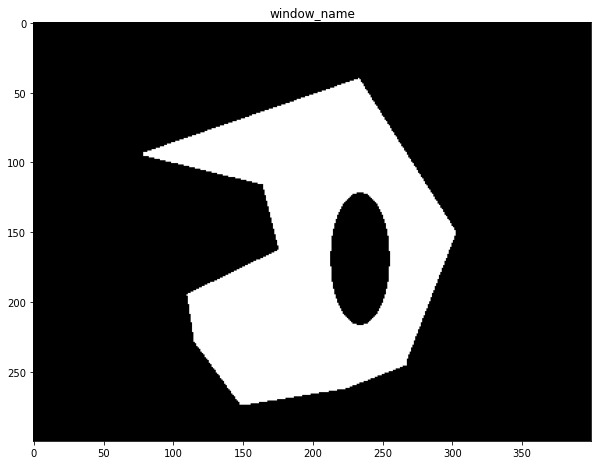

In [289]:
img = binar_image(imgt, 0.8)
show_picture_plot(img)

In [290]:
hz = 0.2
new_lines=[]
dt = 1
filter = Filter.hpf(hz, dt, 64)
# filter = Filter.lpf(0.07, dt, 64)
# filter = Filter.bsf(0.05, 0.9, dt, 64)
# print(lines.shape)
print(img.shape[1])
for i in range(img.shape[0]):
    # line_f = fourier_transform_1d(img[i])
    conv = convolution(img[i], filter)
    new_lines.append(conv)
    if i%100==0:
        print((i/(img.shape[1]//2))*100)

new_lines_v=[]
dt = 1
filter = Filter.hpf(hz, dt, 64)
# filter = Filter.lpf(0.07, dt, 64)
# filter = Filter.bsf(0.05, 0.9, dt, 64)
# print(lines.shape)
print(img.shape[0])
for i in range(img.shape[1]):
    # line_f = fourier_transform_1d(img[i])
    conv = convolution(img[:,i], filter)
    new_lines_v.append(conv)
    if i%100==0:
        print((i/(img.shape[0]))*100)

400
0.0
50.0
100.0
300
0.0
33.33333333333333
66.66666666666666
100.0


(400, 300)
(300, 400)
(300, 400)


True

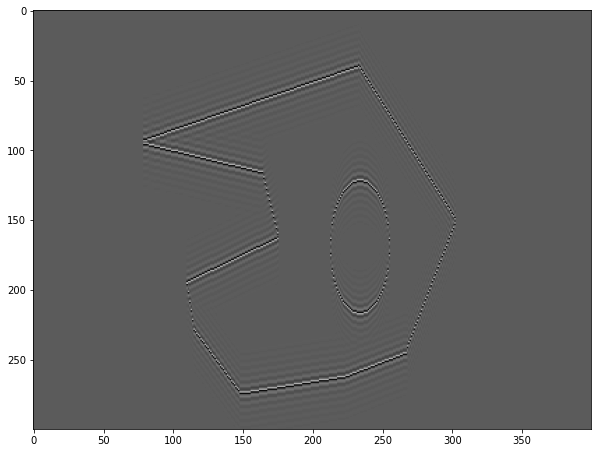

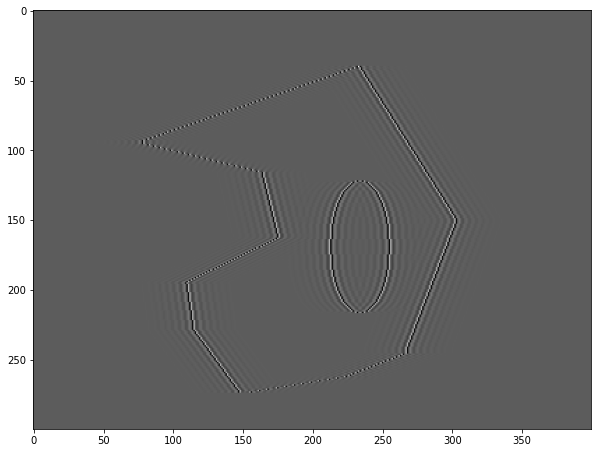

In [291]:
new_lines_v = np.array(new_lines_v)
print(new_lines_v.shape)
new_lines_v = cv.rotate(new_lines_v, cv.ROTATE_90_CLOCKWISE)
new_lines_v = new_lines_v[:,::-1]
# new_lines_v= np.reshape(new_lines_v, (xlen, ylen))
print(new_lines_v.shape)
show_picture_plot(new_lines_v,'')
cv.imwrite(path+'3.jpg',new_lines_v)


new_lines = np.array(new_lines)
print(new_lines.shape)
show_picture_plot(new_lines,'')
cv.imwrite(path+'3.jpg',new_lines)

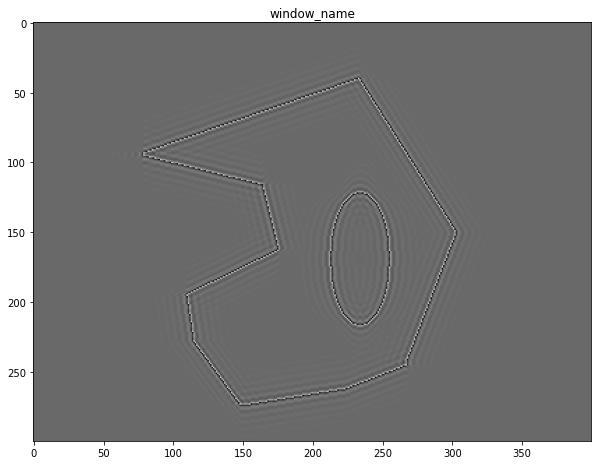

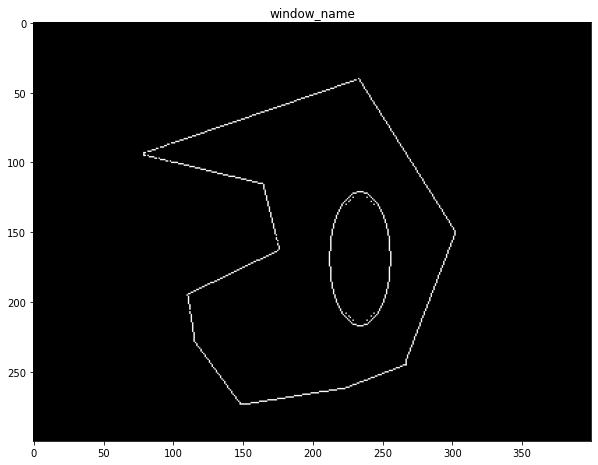

In [298]:
tempur = new_lines_v + new_lines
show_picture_plot(tempur)

tempur = binar_image(tempur, 0.54)
show_picture_plot(tempur)

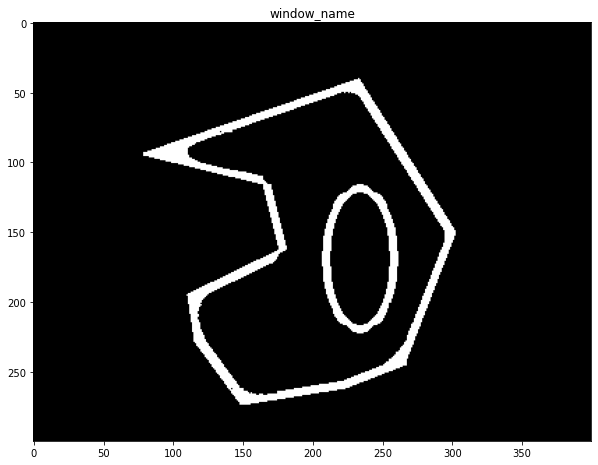